In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../datasets/tumor_attributes/primary-tumor.data',header=None, keep_default_na=False, na_values=['?'])
#df=df.replace('?',np.nan)
df=df.fillna(0)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1.0,0.0,3.0,2,2,1,2,2,2,2,2.0,2,2,2.0,2,2
1,1,1,1.0,0.0,3.0,2,2,2,2,2,1,2,2.0,2,1,2.0,1,2
2,1,1,2.0,2.0,3.0,1,2,2,2,2,2,2,2.0,2,2,2.0,1,2
3,1,1,2.0,0.0,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2
4,1,1,2.0,0.0,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,22,2,2.0,2.0,0.0,2,2,2,2,2,2,2,2.0,2,2,1.0,2,2
335,22,2,2.0,2.0,0.0,2,2,2,2,2,2,2,2.0,2,2,1.0,2,2
336,22,2,2.0,0.0,0.0,1,2,2,2,2,2,2,2.0,2,1,1.0,2,2
337,22,3,2.0,2.0,2.0,2,2,2,2,2,2,2,2.0,1,1,1.0,2,2


In [4]:
df_=df[df.loc[:,0].isin([1,4])]

X=df.loc[:,1:].values.astype(int)
y=df.loc[:,0].values

X_=df_.loc[:,1:].values.astype(int)
y_=df_.loc[:,0].values

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pylab as plt

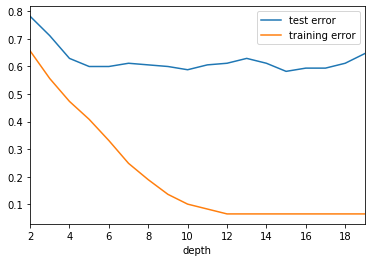

In [6]:
Result=[]
C=np.arange(1,23)
df_=df[df.loc[:,0].isin(C)]

X_=df_.loc[:,1:].values.astype(int)
y_=df_.loc[:,0].values
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=.5)

for M in np.arange(2,20):
    clfd_=DecisionTreeClassifier(max_depth=M)

    clfd_.fit(X_train_,y_train_)
    y_pred_in=clfd_.predict(X_train_)
    y_pred=clfd_.predict(X_test_)
    #print(y_pred)
    [ins,oos]=[1-accuracy_score(y_test_, y_pred, normalize=True),1-accuracy_score(y_train_, y_pred_in, normalize=True)]
    Result=Result+[M,ins,oos]
Result=pd.DataFrame(np.array(Result).reshape(int(len(Result)/3),3))
#plt.plot(Result[:,0],Result[:,1])
#plt.plot(Result[:,0],Result[:,2])
Result.columns=['depth','test error','training error']
Result=Result.set_index('depth')
Result.plot()

In [7]:
int(len(Result)/3)

6

In [11]:

path = clfd_.cost_complexity_pruning_path(X_train_, y_train_)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

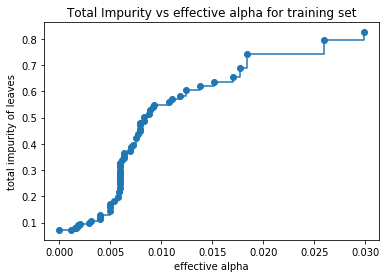

In [12]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [13]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_, y_train_)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06668660308999952


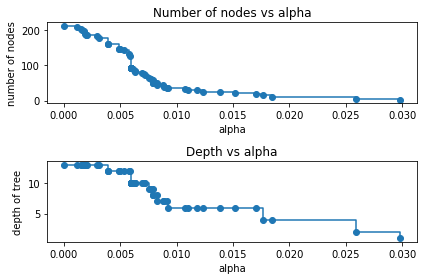

In [14]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

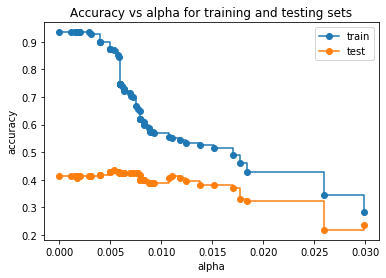

In [15]:
train_scores = [clf.score(X_train_, y_train_) for clf in clfs]
test_scores = [clf.score(X_test_, y_test_) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()